In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Задание 1
## При помощи программы «Moons», (листинг: Вариант 2, см. Приложение 1) получить исходные данные для задачи классификации: матрицу признаков X и массив целевых меток y.

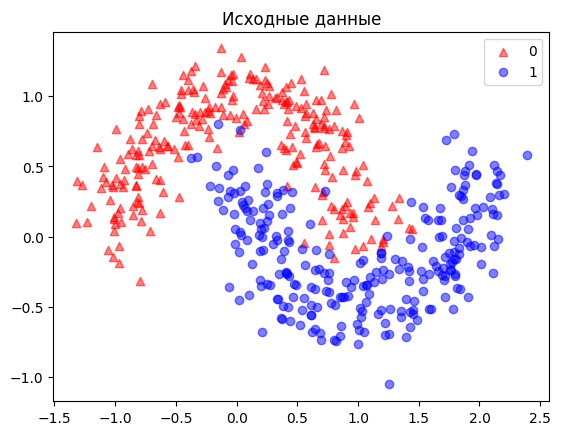

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=512, random_state=123, noise=0.18)
plt.figure(1)
plt.scatter(x[y == 0, 0], x[y == 0, 1], color='red', marker='^', alpha=0.5, label='0')
plt.scatter(x[y == 1, 0], x[y == 1, 1], color='blue', marker='o', alpha=0.5, label='1')
plt.legend()
plt.title("Исходные данные")
plt.show()

In [6]:
x_svm = x.copy()
y_svm = y.copy()


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

# Задание 2
## Создать и обучить модель классификации на основе метода опорных векторов, использующую линейное ядро и дополнительный признак – квадрат расстояния от центра. Выбрать оптимальные гиперпараметры модели. Определить и вывести на печать удельные количества ошибок на обучающем и тестовом подмножествах данных.


In [8]:
# Добавление нового признака
x_svm = x.copy()

x_extra = np.sqrt(np.sum(x_svm**2, axis=1))

x_svm = np.concatenate((x_svm, x_extra.reshape(512, 1)), axis=1)

In [9]:
print(x_svm.shape)

(512, 3)


In [10]:
x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(x_svm, y, test_size=0.3, stratify=y)

In [11]:
param_grid_svm = {'C': [1, 10, 100, 1000],
              'kernel': ['linear']}
svm = SVC()
grid_svm = GridSearchCV(svm, param_grid_svm)
grid_svm.fit(x_train_svm, y_train_svm)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000], 'kernel': ['linear']})

In [12]:
best_params = grid_svm.best_params_
print('\n best_params=', best_params)


 best_params= {'C': 1, 'kernel': 'linear'}


In [13]:
print(f'''Удельное количество ошибок на обучающем наборе: {np.mean(y_train_svm != grid_svm.best_estimator_.predict(x_train_svm))}
Удельное количество ошибок на тестовом наборе: {np.mean(y_test_svm != grid_svm.best_estimator_.predict(x_test_svm))}''')

Удельное количество ошибок на обучающем наборе: 0.11173184357541899
Удельное количество ошибок на тестовом наборе: 0.14285714285714285


# Задание 3
## Создать и обучить модель классификации «Случайный лес». Выбрать оптимальные гиперпараметры модели. Определить и вывести на печать удельные количества ошибок на обучающем и тестовом подмножествах данных. Построить график области решений при помощи функции plot_decision_regions(), разработанной ранее на практических занятиях.

In [14]:
def plotDecisionRegions(x, y, classifier, resolution=0.02, test_idx=None):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = x[:,0].min() - 1, x[:,0].max() + 1
    x2_min, x2_max = x[:,1].min() - 1, x[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=colors[idx],
                    edgecolor='black', marker = markers[idx], label=cl)
        if test_idx:
            x_test = x[test_idx, :]
            plt.scatter(x_test[:, 0], x_test[:, 1], c='', alpha=1.0,
                        edgecolor='black', linewidths=1, marker='o', s=120,
                        label='test set')

In [15]:
param_grid_rf = {'max_depth': [3, 2, 5, 7, 10],
                 'min_samples_split': [2, 5, 7, 10]}

rf = RandomForestClassifier()

grid_rf = GridSearchCV(rf, param_grid_rf)
grid_rf.fit(x_train, y_train)

best_params = grid_rf.best_params_
print('\n best_params=', best_params)


 best_params= {'max_depth': 7, 'min_samples_split': 7}


In [16]:
print(f'''Удельное количество ошибок на обучающем наборе: {np.mean(y_train != grid_rf.best_estimator_.predict(x_train))}
Удельное количество ошибок на тестовом наборе: {np.mean(y_test != grid_rf.best_estimator_.predict(x_test))}''')

Удельное количество ошибок на обучающем наборе: 0.00558659217877095
Удельное количество ошибок на тестовом наборе: 0.05844155844155844


<ipython-input-14-38f04c819822>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=colors[idx],


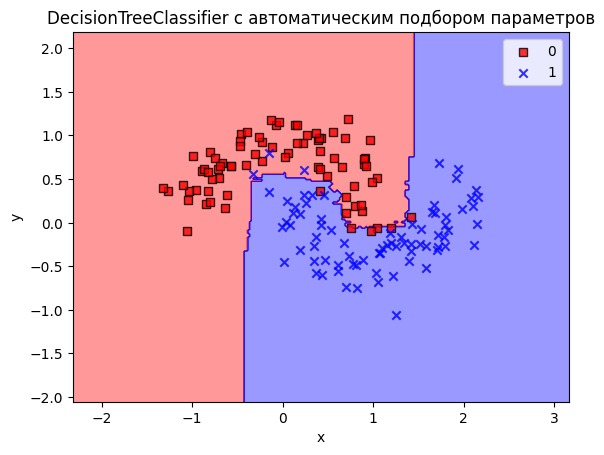

In [17]:
plotDecisionRegions(x_test, y_test, grid_rf.best_estimator_)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('DecisionTreeClassifier с автоматическим подбором параметров')
plt.show()

# Задание 4
## Сравнить качество исследуемых моделей классификации.


In [18]:
print(accuracy_score(y_test_svm, grid_svm.best_estimator_.predict(x_test_svm)))
print(accuracy_score(y_test, grid_rf.best_estimator_.predict(x_test)))

0.8571428571428571
0.9415584415584416


## В ходе лабораторной работы были обучены 2 вида моделей: модель метода опорных векторов и Случайный лес.

## По итогам были получены следующие результаты на тестовой выборке:

## Метод опорных векторов:

## accuracy = 85.7%

## Модель случайного леса:

## accuracy = 94.1%

## Модель случайный лес показал более высокую метрику, что логично, так как данные линейно неразделимы, а в методе опорных векторов используется линейное ядро.